# Basics of Simple Linear Regression

本课程前置需要装的包：

In [21]:
require(s20x)

## 分析数据过程

### 读取数据

读取数据表格，`header=TRUE` 表示第一行是表头，`sep=","` 表示分隔符是逗号。

In [22]:
course.df <- read.table("../data/STATS20x.txt", header = TRUE, sep = "\t")
head(course.df) # 看前面大约10行的内容
dim(course.df) # 看有多少行、多少列
course.df$Exam[1:20] # 看前20行的Exam列

,Grade,Pass,Exam,Degree,Gender,Attend,Assign,Test,B,C,MC,Colour,Stage1,Years.Since,Repeat
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
1,C,Yes,42,BSc,Male,Yes,17.2,9.1,5,13,12,Blue,C,2.5,Yes
2,B,Yes,58,BCom,Female,Yes,17.2,13.6,12,12,17,Yellow,A,2.0,No
3,A,Yes,81,Other,Female,Yes,17.2,14.5,14,17,25,Blue,A,3.0,No
4,A,Yes,86,Other,Female,Yes,19.6,19.1,15,17,27,Yellow,A,0.0,No
5,D,No,35,Other,Male,No,8.0,8.2,4,1,15,Blue,C,3.0,No
6,A,Yes,72,BCom,Female,Yes,18.4,12.7,15,17,20,Blue,A,1.5,No


[1] 146  15

[1] 42 58 81 86 35 72 42 25 36 48 29 54 49 52 28 34 51 81 80 41

### 绘图观测数据

对数据进行绘图分析，着重分析 `Exam` 和 `Test` 两个变量之间的关系。

首先应当粗略查看两者的关系，如线性、二次、曲线、正弦等

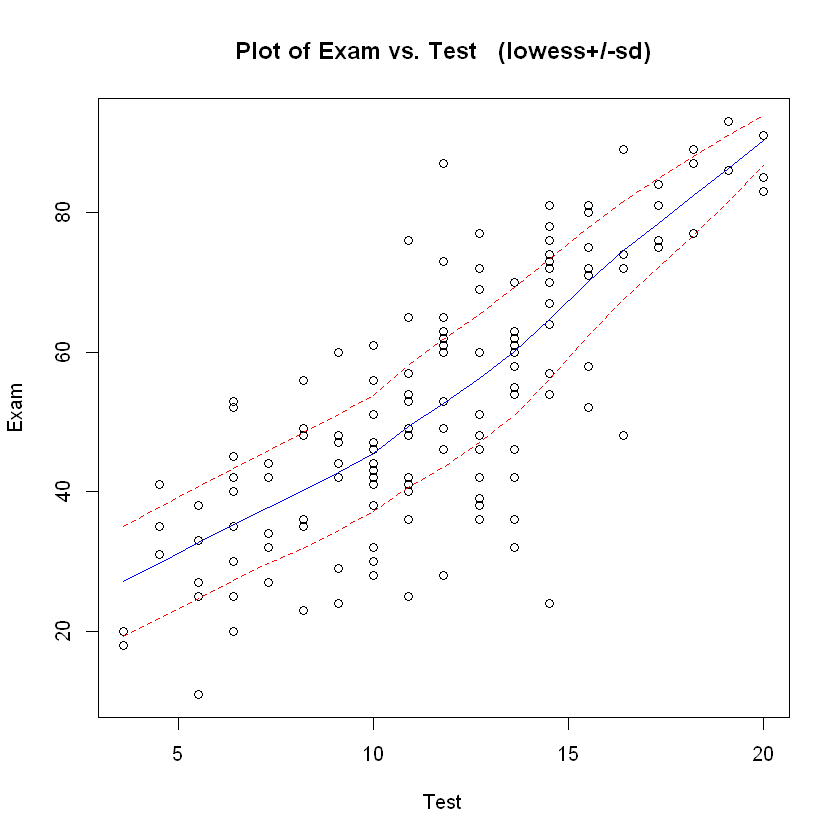

In [23]:
library(s20x)
trendscatter(Exam ~ Test, data = course.df)


### 进行初步拟合

可以看到整体大致呈线性关系，故我们采用线性回归模型。

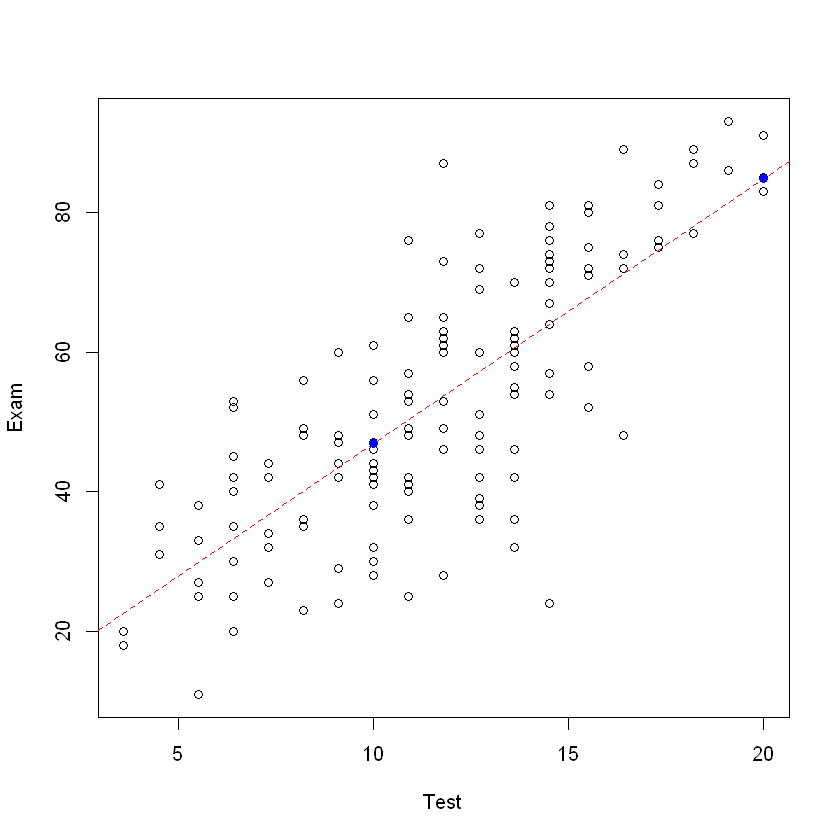

In [24]:
plot(Exam ~ Test, data = course.df)
# 绘制回归直线
examtest.fit <- lm(Exam ~ Test, data = course.df)
# lty = 2 表示虚线，col = "red" 表示红色
abline(examtest.fit, lty = 2, col = "red")

points(
    0,
    predict(examtest.fit, newdata = data.frame(Test = 0)),
    col = "blue",
    pch = 19
)
points(10, predict(examtest.fit, newdata = data.frame(Test = 10)), col = "blue", pch = 19)
points(20, predict(examtest.fit, newdata = data.frame(Test = 20)), col = "blue", pch = 19)

In [25]:
summary(examtest.fit)


Call:
lm(formula = Exam ~ Test, data = course.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.980  -6.471   0.826   8.575  33.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0845     3.2204   2.821  0.00547 ** 
Test          3.7859     0.2647  14.301  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 144 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.5839 
F-statistic: 204.5 on 1 and 144 DF,  p-value: < 2.2e-16


其中：

- Call：表示回归方程，指明了自变量和因变量
- Risiduals：残差，指明了残差的分布，如最大、最小、中值等
- Coefficients：系数，此处即 $a_i$ 和 $b_i$ 的值
- Residual standard error：残差标准差，即残差的标准差
- Multiple R-squared：多元 $R^2$ 值
- Adjusted R-squared：调整后的 $R^2$ 值
- F-statistic：F 统计量，即 F 统计量。F 统计量的分子是回归平方和，分母是残差平方和。F 统计量的值越大，说明回归平方和越大，即回归模型的拟合效果越好。F 统计量的值越小，说明回归平方和越小，即回归模型的拟合效果越差。p-value 则相反。

## 分析数据是否可以接受

### 残差观测

针对指定行分析预测值和残差：

In [26]:
data.frame(course.df$Test[1], course.df$Exam[1]) # 原第一行
# 按照 tidyverse 的风格，也可以使用 dplyr 包的 select 函数来选择列
# dplyr::select(course.df[1, ], Exam, Test)
fitted(examtest.fit)[1] # 拟合值
resid(examtest.fit)[1] # 残差

course.df.Test.1.,course.df.Exam.1.
<dbl>,<int>
9.1,42


1 
43.53637

1 
-1.536371

检验上，一个成功的拟合模型的残差应当有：

1. 残差均值接近于 0
2. 残差满足正态分布
3. 没有或排除了异常点

#### 残差均值接近于 0

分析残差，看是否符合均值等于0

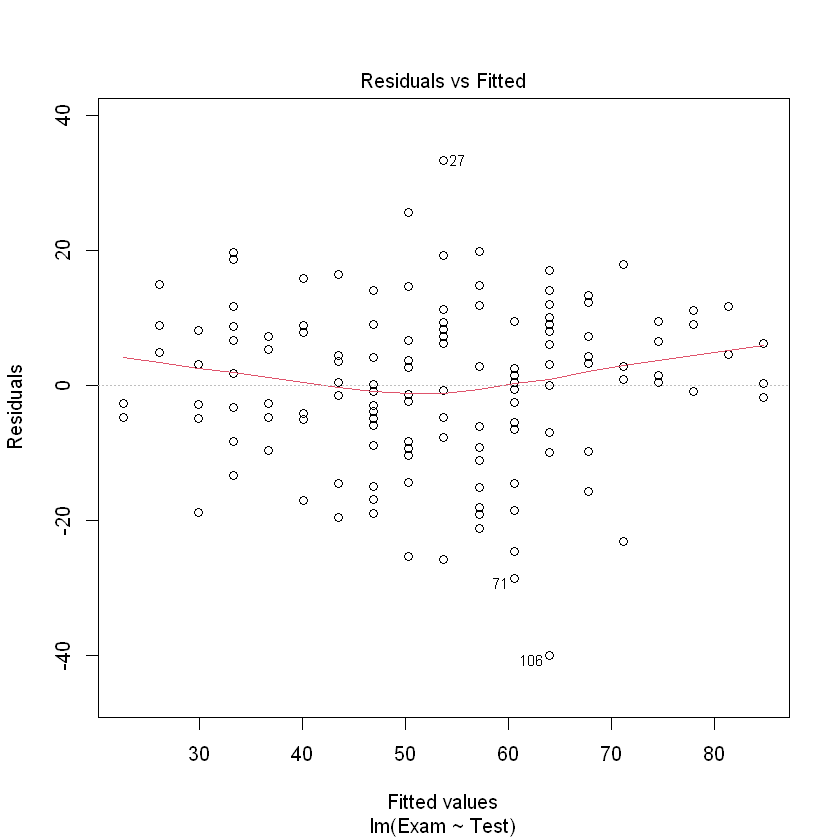

In [27]:
# 其中 which = 1 表示残差直方图（histogram of residuals），
# which = 2 表示残差QQ图（qqplot，即 normal quantile-quantile-plot），
# which = 3 表示残差标准化图
plot(examtest.fit, which = 1)

#### 残差满足正态分布

残差在分布上在符合正态同分布：iid – independence（并且这是根据学生在考试中应该相互独立的表现）。残差应该有大致恒定的散布。这其实是 Equality Of Variance (EOV，方差相等) 原则。

检查残差是否满足正态分布：

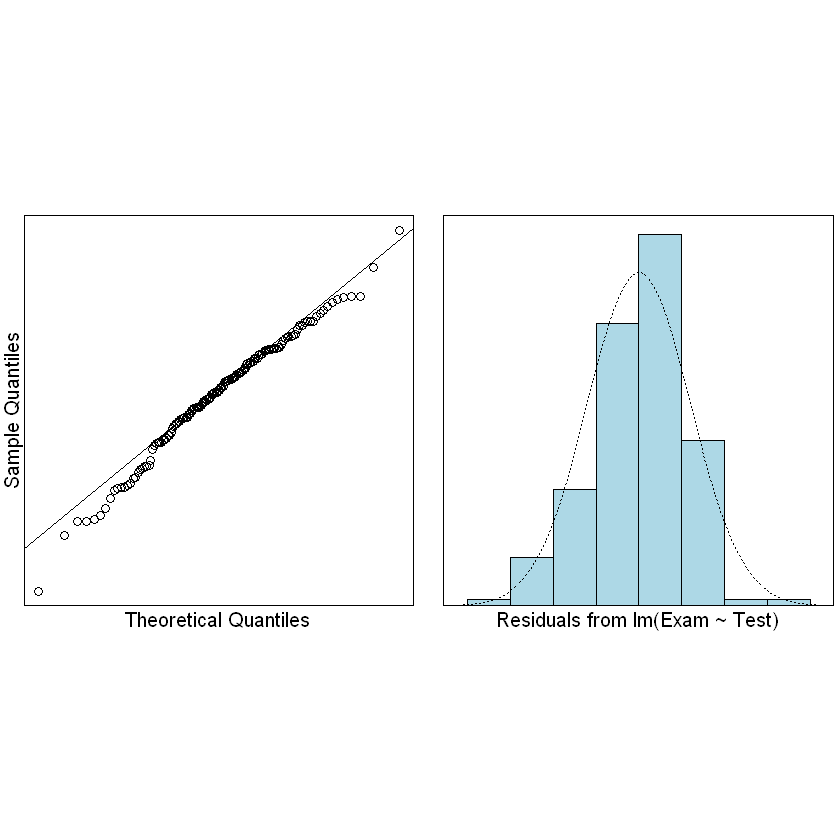

In [28]:
normcheck(examtest.fit)


Call:
lm(formula = Exam ~ Test, data = course2.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.251  -6.846   2.638   9.456  33.996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.2374     3.7172   4.099 6.88e-05 ***
Test          3.2006     0.3023  10.588  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.34 on 145 degrees of freedom
Multiple R-squared:  0.436,	Adjusted R-squared:  0.4322 
F-statistic: 112.1 on 1 and 145 DF,  p-value: < 2.2e-16


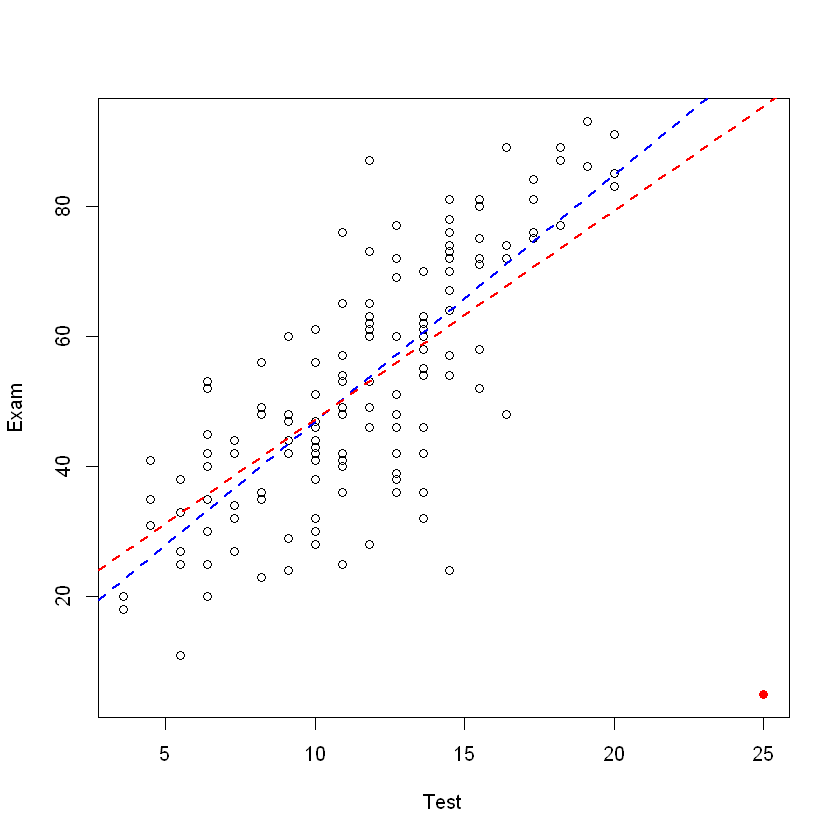

In [29]:
# 创造一个包含异常点的数据集并验证异常点对回归直线的影响
n <- nrow(course.df)
# 复制一数据集的最后一行
course2.df <- course.df[c(1:n, n), ]
# 修改新数据集的最后一行的 Test 和 Exam 列的值，故意创造一个差异极大的观测值
course2.df[n + 1, c("Test", "Exam")] <- c(25, 5)
# 画出散点图
plot(Exam ~ Test, data = course2.df)
## 并标记我们创建的新的观测点
points(25, 5, pch = 19, col = "red")

# 如果有的观测值是异常值，那么回归直线就会受到影响
examtest2.fit <- lm(Exam ~ Test, data = course2.df)
summary(examtest2.fit)

# 或者直接画图验证该点造成的影响
abline(examtest.fit, lty = 2, lwd = 2, col = "blue")
abline(examtest2.fit, lty = 2, lwd = 2, col = "red")

对其进行观测值差异分析：

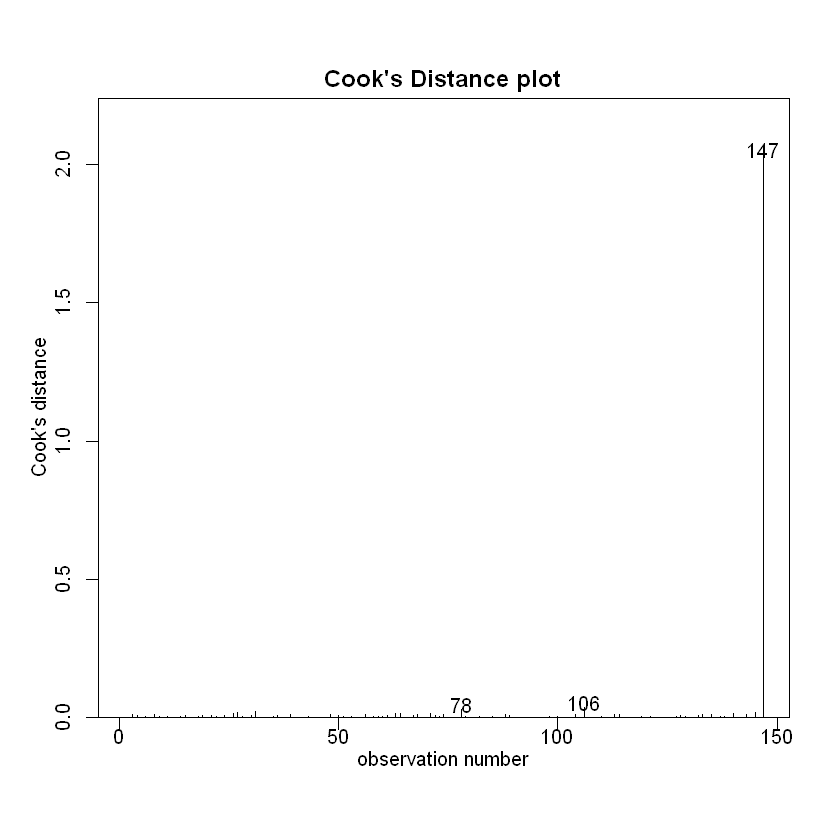

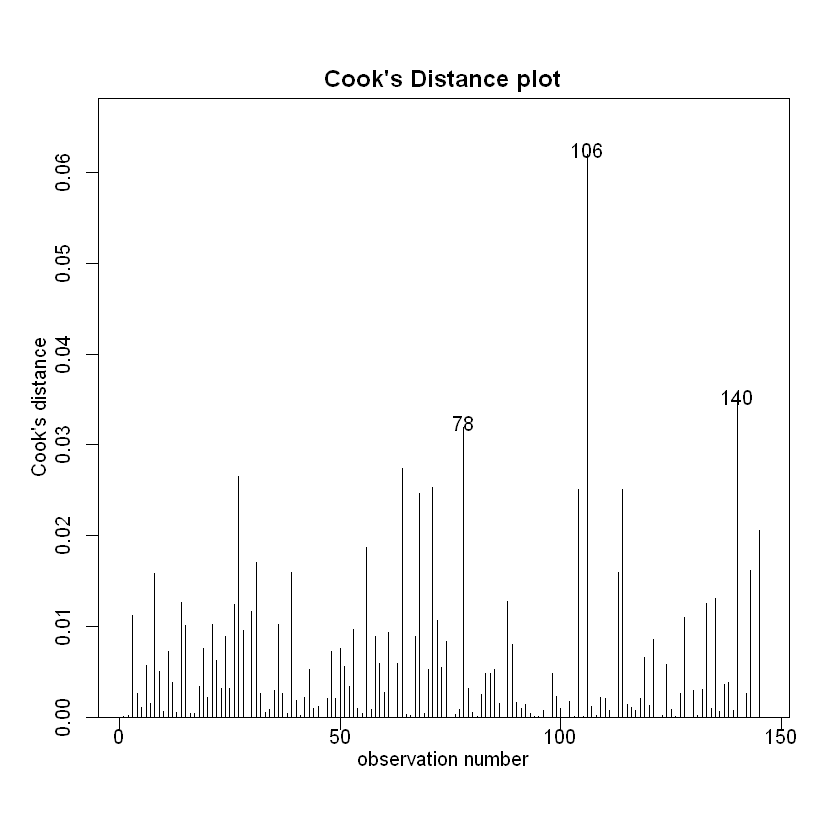

In [30]:
# 画出异常值的影响
cooks20x(examtest2.fit)
# 对比原来的值影响
cooks20x(examtest.fit)

### R 方观测

R Squared 即 R 平方，是回归平方和与总平方和的比值，即 $R^2 = \frac{SSR}{SST}$，其中 SSR 为回归平方和，SST 为总平方和。R 平方的值越大，说明回归平方和越大，即回归模型的拟合效果越好。R 平方的值越小，说明回归平方和越小，即回归模型的拟合效果越差。

SSR 即回归平方和，是因变量的预测值与因变量的均值之差的平方和，即 $SSR = \sum_{i=1}^n (y_i - \bar{y})^2$，其中 $y_i$ 为第 $i$ 个观测值，$\bar{y}$ 为因变量的均值。下面将简要介绍 SSR 的计算方法。

In [31]:
# 消除一次项
examnull.fit = lm(Exam ~ 1, data = course.df)
summary(examnull.fit)
# 对比之前的 Summary
summary(examtest.fit)


Call:
lm(formula = Exam ~ 1, data = course.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.877 -12.877  -1.377  15.623  40.123 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   52.877      1.546   34.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.68 on 145 degrees of freedom



Call:
lm(formula = Exam ~ Test, data = course.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.980  -6.471   0.826   8.575  33.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0845     3.2204   2.821  0.00547 ** 
Test          3.7859     0.2647  14.301  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 144 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.5839 
F-statistic: 204.5 on 1 and 144 DF,  p-value: < 2.2e-16


此时我们可以得到 SS（Null）的值 18.68，以及 SS（Test）的值 12.05。

R 方的值即 1 - SS（Null）/SS（Test）的值，即 0.5868。

置信区间：$[a_i - 2SE(a_i), a_i + 2SE(a_i)]$，即 $[a_i - 2\sqrt{Var(a_i)}, a_i + 2\sqrt{Var(a_i)}]$，其中 $Var(a_i)$ 为 $a_i$ 的方差。

### 每一个拟合值的 T 检验

> 知道看什么，什么意思，怎么看

In [32]:
summary(examtest.fit)


Call:
lm(formula = Exam ~ Test, data = course.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.980  -6.471   0.826   8.575  33.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0845     3.2204   2.821  0.00547 ** 
Test          3.7859     0.2647  14.301  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 144 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.5839 
F-statistic: 204.5 on 1 and 144 DF,  p-value: < 2.2e-16


可以看出 Test 行的 Pr（P-value）的值小于 2.2x10^-16，远小于 0.05，故拒绝原假设，即拟合值的系（旁边的3颗*也表示可信度极高，即该斜率的线性拟合极好）

- 零假设 $H_0$：Test 和 Exam 之间的线性关系系数为 0（没有线性关系），即 即 $a_i$ 的系数为 0
- 备择假设 $H_1$：Test 和 Exam 之间的线性关系系数不为 0（有线性关系），即 即 $a_i$ 的系数不为 0

我们对于斜率的置信程度，是由标准误差决定的，即 $SE(a_i)$，即 $SE(a_i) = \sqrt{\frac{SSE}{n-2}}$，其中 SSE 为残差平方和，即 $SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2$，其中 $\hat{y_i}$ 为第 $i$ 个观测值的预测值，即 $\hat{y_i} = a_i + b_i x_i$，$x_i$ 为第 $i$ 个观测值的自变量值。此处的 $se(a)$ 为 0.2647。于是我们有：

$$
\frac{3.7859 - 0}{0.2647} = 14.34
$$

此结果表示偏离此结果的标准差，这个数字越大，代表我们对于斜率的置信程度越高。

## 利用分析结果做预测

### 拟合值的置信区间

In [33]:
confint(examtest.fit)
# Intercept 即截距，Test 即斜率
# 也可以自己修改置信水平
confint(examtest.fit, level = 0.99)

,2.5 %,97.5 %
(Intercept),2.719020,15.449907
Test,3.262659,4.309189


,0.5 %,99.5 %
(Intercept),0.6778171,17.491110
Test,3.0948635,4.476984


### 预测

1. 准确预测值
2. 预测的均值范围
3. 预测每一个个体的取值范围

区间估计和点估计的区别：

- 区间估计：给出一个区间，表示参数的可能取值范围
- 点估计：给出一个点，表示参数的可能取值

In [34]:
# 区间估计
preds.df <- data.frame(Test = seq(0, 20, by = 10))
predict(examtest.fit, newdata = preds.df, interval = "confidence")
# 点估计
predict(examtest.fit, newdata = preds.df, interval = "prediction")

,fit,lwr,upr
1,9.084463,2.71902,15.44991
2,46.943703,44.80912,49.07828
3,84.802942,79.97021,89.63568


,fit,lwr,upr
1,9.084463,-15.56475,33.73368
2,46.943703,23.03510,70.85231
3,84.802942,60.50438,109.10151


其中：

- 区间估计表格的 [2,2:3] 表示所有半期考试10分，期末考试的分数的均值的范围
- 区间估计表格的 [2,2:3] 表示所有半期考试10分个体的分数的范围，落在这个范围即为正常值

## 总结

遇到此类问题，通用思路（适用于分析x和y两个未知数的某种关系）：

- 绘制数据散点图并简要查看自变量与因变量之间是哪种关系（如果有关系），最好是能够通过工具分析（也可能会有一份研究意图的声明可以被指导）。提出适当的研究方式。在上边的例子中，我们就决定采用了线性模型：

    $$
    y = β_0 + β_1x_i + ε_i, ε_i ∼ N(0, σ^2) (where β_1 > 0)
    $$

- 使用 `lm` 函数进行模型拟合。
- 检查我们提出的假设进行合适方式的验证。
    - Independence OK? (how were the data collected?)
    - EOV Okay? Using `plot(examtest.fit, which = 1)`.
    - Normality Okay? Using `normcheck`.
    
    If these are okay then go to next step.
- 尝试适时删除任何不重要的解释变量（后面会讲）。如果能删除，请检查新的研究方式。
- 确保个别要点不会产生过分的不适当的影响，并尝试删除/纠正它们。Using `cooks20x`.
- 做出结论/预测，讨论极限，并回答相关的研究问题。

注意：在上述步骤中，在对当前步骤满意之前，切记不要匆忙进行下一步。